Chapters:

1) Explore
2) Generating New Columns
3) Cleaning Columns
4) Dropping Rows
5) Dropping Columns
6) Saving to CSV
7) Describing data

In [800]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import gender_guesser.detector as gender

In [801]:
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", 80)
pd.set_option("display.precision", 2)

In [802]:
df = pd.read_csv('original_do_not_change.csv', encoding="UTF-8")

# Exploring the Data

In [803]:
df.shape

(12495, 74)

In [804]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20220624204326,2022-06-25,Copenhagen 'N Livin',Lovely apartment located in the hip Nørrebro a...,"Nice bars and cozy cafes just minutes away, ye...",https://a0.muscache.com/pictures/42044170/f63c...,16774,https://www.airbnb.com/users/show/16774,Simon,2009-05-12,"København, Denmark",I'm currently working as an environmental cons...,within a day,90%,55%,f,https://a0.muscache.com/im/users/16774/profile...,https://a0.muscache.com/im/users/16774/profile...,Nørrebro,1.0,1.0,"['email', 'phone']",t,f,"Copenhagen, Hovedstaden, Denmark",Nrrebro,NaN,55.69,12.55,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Stove"", ""Free washer \u2013 In unit"", ""Coffe...",$877.00,3,15,3.0,3.0,15.0,15.0,3.0,15.0,NaN,t,0,0,22,22,2022-06-25,171,3,3,2009-09-04,2022-06-16,4.78,4.78,4.79,4.86,4.89,4.72,4.70,NaN,f,1,1,0,0,1.10
1,26057,https://www.airbnb.com/rooms/26057,20220624204326,2022-06-25,Lovely house - most attractive area,Our lovely house in the center of the city is ...,The neighborhood is the most famous one and th...,https://a0.muscache.com/pictures/miso/Hosting-...,109777,https://www.airbnb.com/users/show/109777,Kari,2010-04-17,"København, Denmark","We are a family with 2 children, and living in...",within an hour,100%,38%,f,https://a0.muscache.com/im/users/109777/profil...,https://a0.muscache.com/im/users/109777/profil...,Indre By,1.0,1.0,"['email', 'phone']",t,t,"Copenhagen, Hovedstaden, Denmark",Indre By,NaN,55.69,12.58,Entire home,Entire home/apt,6,NaN,1.5 baths,4.0,4.0,"[""Private fenced garden or backyard"", ""Stove"",...","$2,400.00",4,1125,4.0,4.0,1125.0,1125.0,4.0,1125.0,NaN,t,0,3,9,224,2022-06-25,58,8,0,2013-12-02,2022-05-15,4.91,4.93,4.96,4.92,4.85,4.94,4.81,NaN,f,1,1,0,0,0.56
2,26473,https://www.airbnb.com/rooms/26473,20220624204326,2022-06-25,City Centre Townhouse Sleeps 1-10 persons,GUESTHOUSE ON KNABROSTRÆDE - located in the ab...,NaN,https://a0.muscache.com/pictures/8e132ba0-b68c...,112210,https://www.airbnb.com/users/show/112210,Julia,2010-04-22,"Copenhagen, Denmark","Active young woman, started as an expat in Cop...",within an hour,100%,94%,f,https://a0.muscache.com/im/pictures/user/8a185...,https://a0.muscache.com/im/pictures/user/8a185...,Indre By,11.0,11.0,"['email', 'phone', 'work_email']",t,t,NaN,Indre By,NaN,55.68,12.58,Entire townhouse,Entire home/apt,11,NaN,2 baths,5.0,5.0,"[""Essentials"", ""Cooking basics"", ""TV"", ""Stove""...","$3,350.00",3,31,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,3,3,3,3,2022-06-25,293,0,0,2010-10-14,2020-03-02,4.53,4.62,4.44,4.77,4.69,4.88,4.60,NaN,f,11,6,5,0,2.06
3,29118,https://www.airbnb.com/rooms/29118,20220624204326,2022-06-25,Best Location in C

In [805]:
df.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.25e+04,12495,1.25e+04,12495,12495,12156,6461,12495,1.25e+04,12495,12494,12494,12472,6400,9658,9658,10958,12494,12494,12494,5391,12494.00,12494.00,12494,12494,12494,6461,12495,0.0,12495.00,12495.00,12495,12495,12495.00,0.0,12483,12277.00,12330.00,12495,12495,12495.00,12495.00,12494.00,12494.00,12494.00,12494.00,12494.00,12494.00,0.0,12495,12495.00,12495.00,12495.00,12495.00,12495,12495.00,12495.00,12495.00,10191,10191,10191.00,10141.00,10141.00,10141.00,10141.00,10140.00,10141.00,0.0,12495,12495.00,12495.00,12495.00,1.25e+04,10191.00
unique,NaN,12495,NaN,2,12002,11944,6231,12386,NaN,11157,3454,3456,513,5427,4,68,99,2,10973,10973,35,NaN,NaN,7,2,2,203,11,NaN,NaN,NaN,52,4,NaN,NaN,20,NaN,NaN,11914,1783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2607,1284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/6983,NaN,2022-06-25,Cozy apartment in the heart of Copenhagen,Nyd det simple liv i denne fredelige og centra...,Distance to most popular attractions:<br /><br...,https://a0.muscache.com/pictures/950aadd4-4c99...,NaN,https://www.airbnb.com/users/show/187610263,ApartmentinCopenhagen,2018-05-03,"Copenhagen, Denmark",Vi udlejer møblerede lejligheder og har mere e...,within an hour,100%,100%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Nørrebro,NaN,NaN,"['email', 'phone']",t,t,"Copenhagen, Denmark",Vesterbro-Kongens Enghave,NaN,NaN,NaN,Entire rental unit,Entire home/apt,NaN,NaN,1 bath,NaN,NaN,"[""TV"", ""Paid parking on premises"", ""Wifi"", ""Sm...","$1,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,NaN,NaN,NaN,2022-06-25,NaN,NaN,NaN,2022-05-29,2022-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,9403,18,22,19,11,NaN,181,181,182,4251,181,4425,7005,3618,11581,187,187,905,NaN,NaN,10318,12307,10467,4733,2044,NaN,NaN,NaN,5931,10982,NaN,NaN,9429,NaN,NaN,23,499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12424,NaN,NaN,NaN,NaN,9403,NaN,NaN,NaN,64,597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9738,NaN,NaN,NaN,NaN,NaN
mean,1.18e+17,NaN,2.02e+13,NaN,NaN,NaN,NaN,NaN,1.00e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.99,7.99,NaN,NaN,NaN,NaN,NaN,NaN,55.68,12.56,NaN,NaN,3.44,NaN,NaN,1.69,2.07,NaN,NaN,4.60,494.46,4.47,5.20,588.87,630.29,4.83,615.28,NaN,NaN,5.73,10.64,16.53,90.92,NaN,18.07,4.48,0.69,NaN,NaN,4.78,4.85,4.70,4.89,4.91,4.83,4.72,NaN,NaN,5.00,4.75,0.24,4.08e-03,0.76
std,2.42e+17,NaN,0.00e+00,NaN,NaN,NaN,NaN,NaN,1.23e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.17,44.17,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.03,NaN,NaN,1.76,NaN,NaN,1.31,1.43,NaN,NaN,17.12,509.22,17.03,18.96,522.12,518.43,18.52,513.7

In [806]:
# Columns with no values
print('Columns with all values missing:')
for col in df.columns: 
    if df[col].count() == 0:
        print(col)

Columns with all values missing:
neighbourhood_group_cleansed
bathrooms
calendar_updated
license


In [807]:
# Columns with only one value
print('\nColumns with only one value:')
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) == 1 and not np.isnan(unique_values).all():
        print(column)


Columns with only one value:
scrape_id


<Figure size 500x300 with 0 Axes>

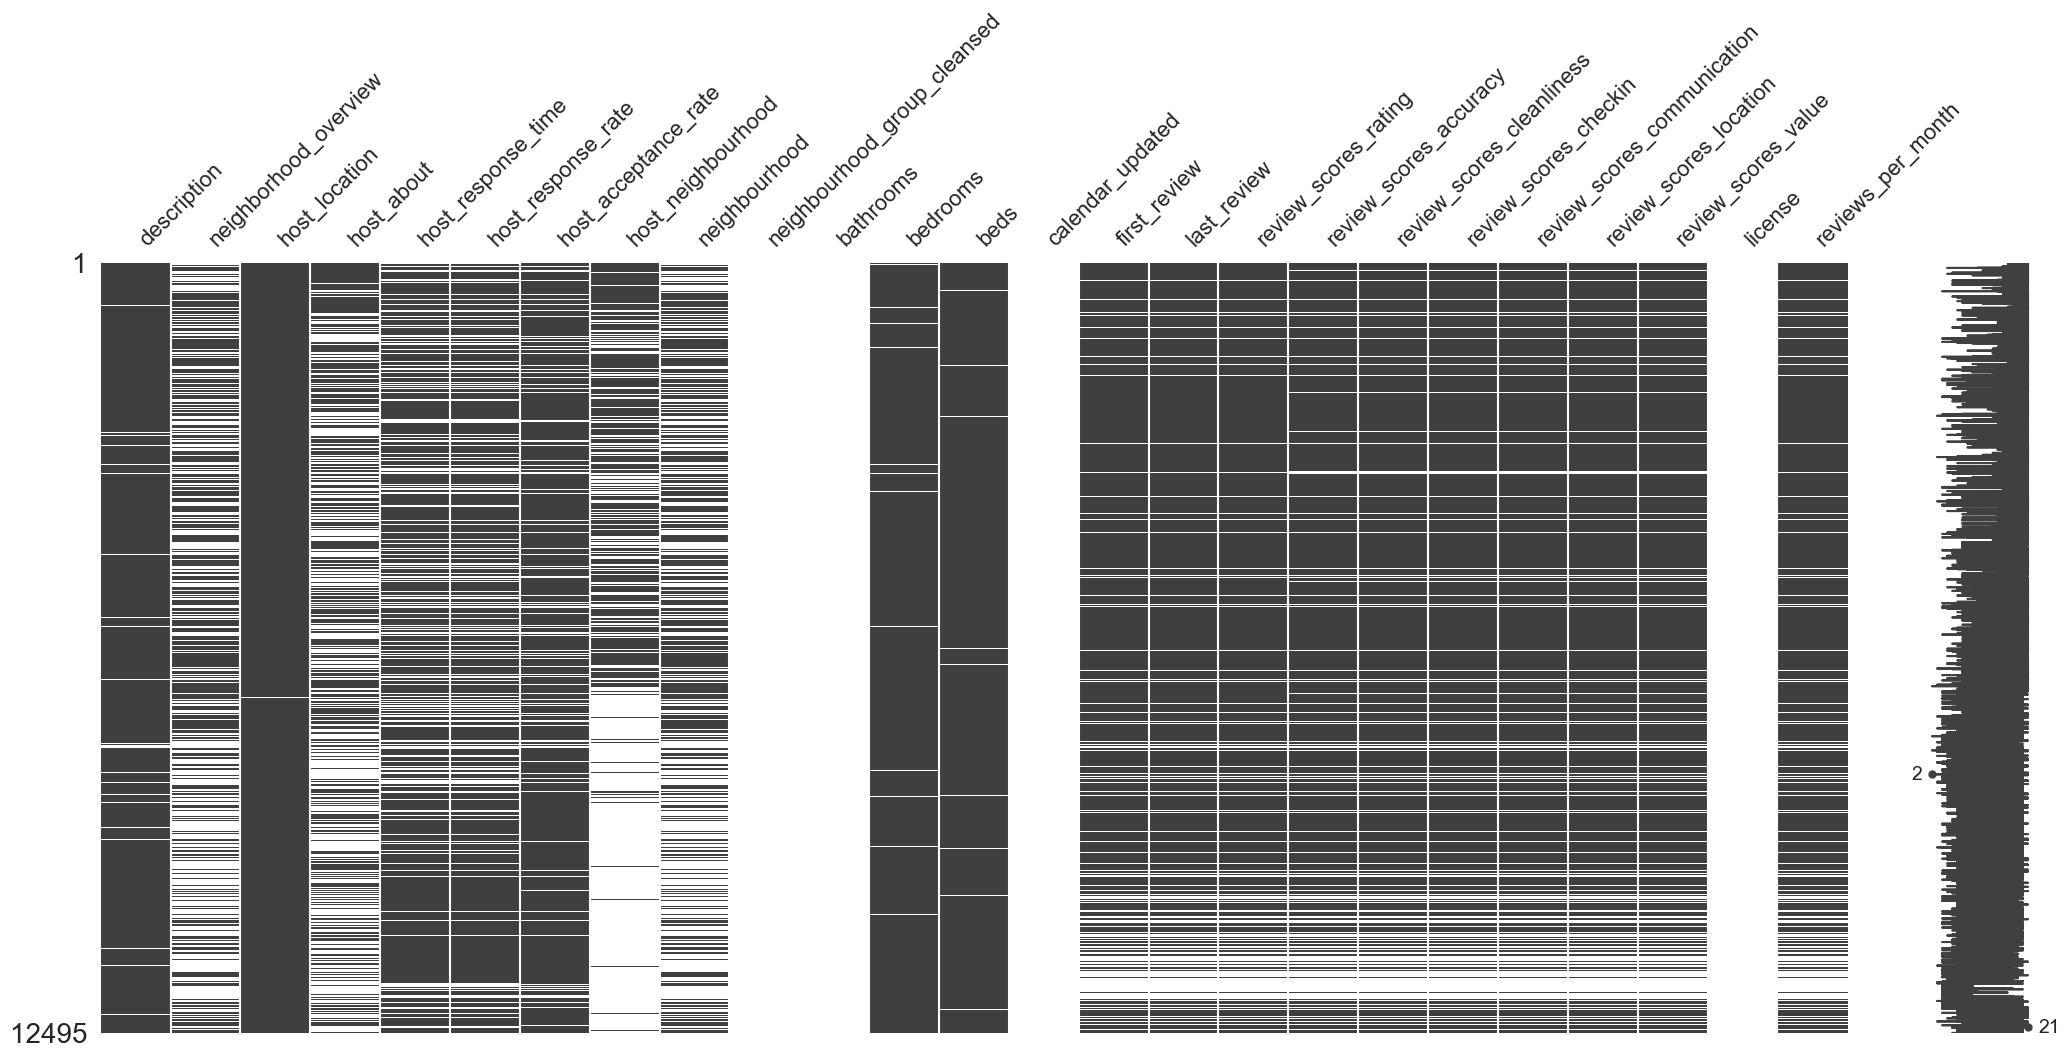

In [808]:
# Rows with missing values
total_rows = len(df)
missing_values_percent = (df.isnull().sum() / total_rows) * 100
missing_values_percent = missing_values_percent[missing_values_percent > 0.1]
missing_values_percent_df = missing_values_percent.reset_index()
missing_values_percent_df.columns = ['Column', 'Percentage of Missing Values']

columns_with_missing_data = missing_values_percent_df['Column'].tolist()
df_subset = df[columns_with_missing_data]
plt.figure(figsize=(5, 3))
msno.matrix(df_subset)
plt.show()


In [809]:
# Identical columns
identical_columns = []

columns_with_more_than_one_unique_value = []
for column in df.columns:
    unique_values = df[column].dropna().unique()  # Drop NaN before checking unique values
    if len(unique_values) > 1:
        columns_with_more_than_one_unique_value.append(column)

identical_columns = []
for i in range(len(columns_with_more_than_one_unique_value)):
    for j in range(i + 1, len(columns_with_more_than_one_unique_value)):
        col_i = columns_with_more_than_one_unique_value[i]
        col_j = columns_with_more_than_one_unique_value[j]
        if df[col_i].equals(df[col_j]):
            identical_columns.append((col_i, col_j))

print("\nIdentical columns:")
for pair in identical_columns:
    print(f"{pair[0]} and {pair[1]}")


Identical columns:
last_scraped and calendar_last_scraped
host_listings_count and host_total_listings_count


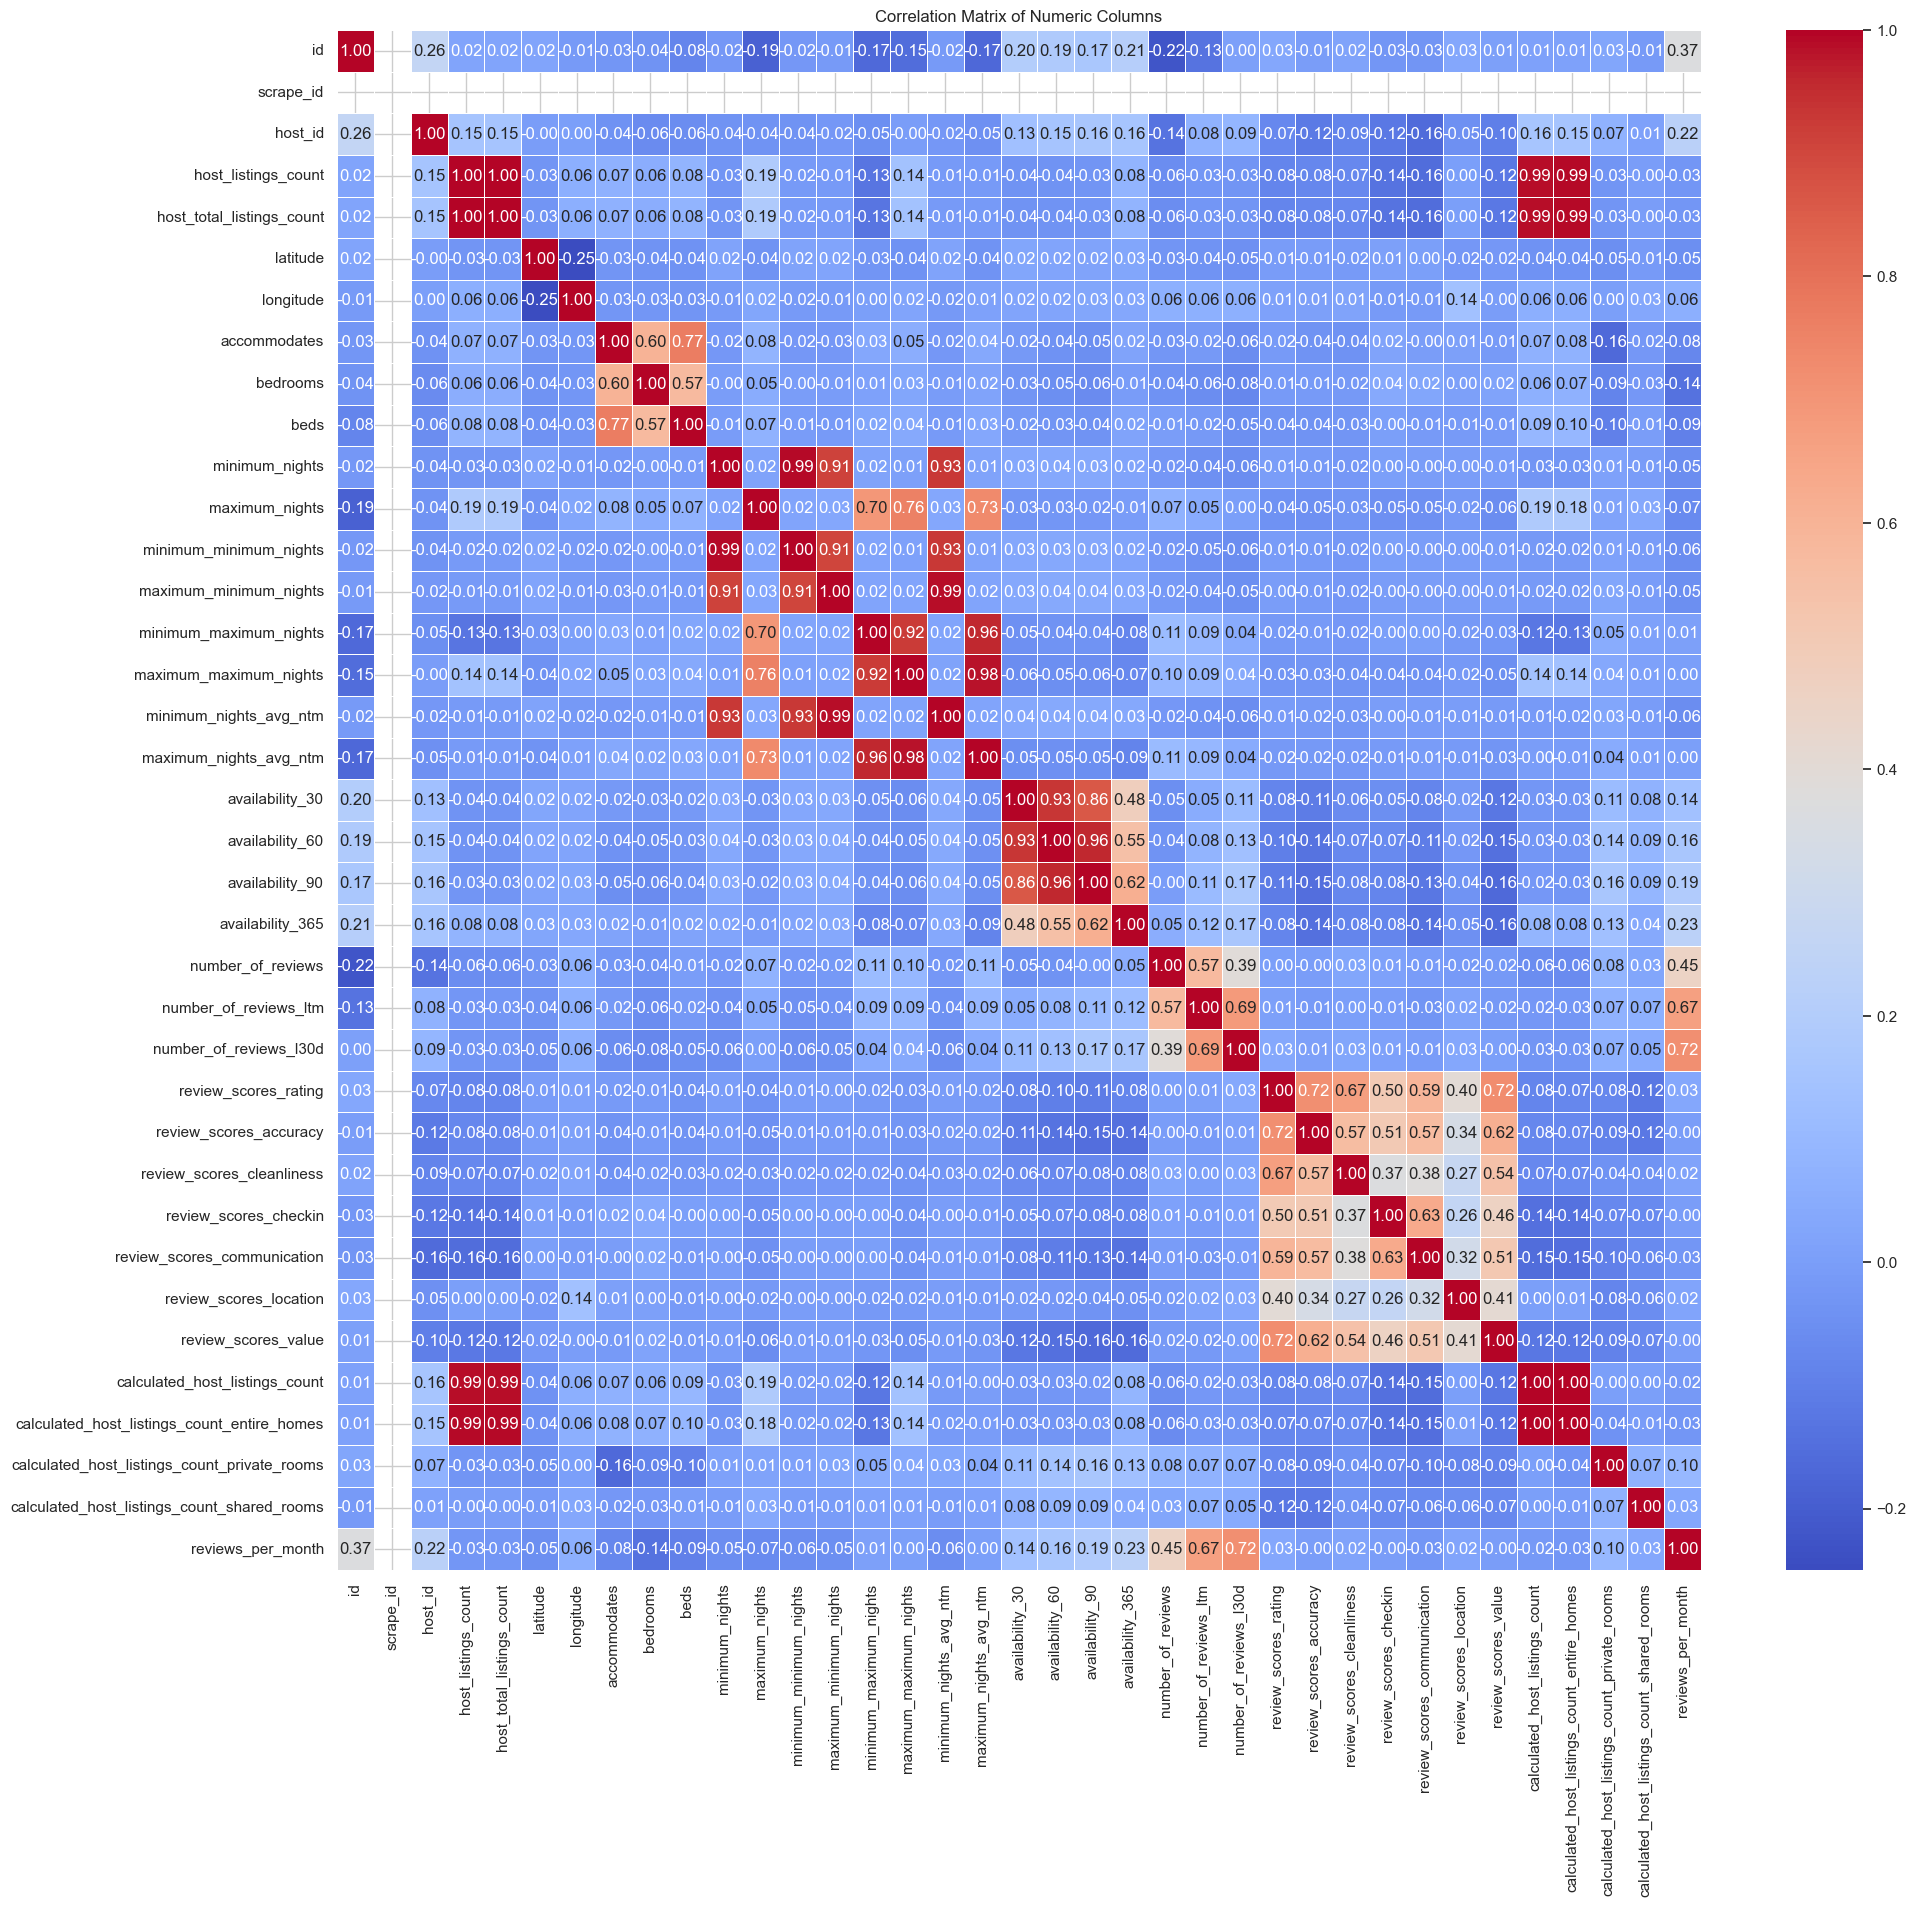

In [810]:
# Correlation matrix
numeric_df = df.select_dtypes(include=['number']).dropna(axis=1, how='all')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

In [811]:
# URL Columns
print('\nURL columns:')
for col in df.columns:
    if 'url' in col.lower():  # This makes the check case-insensitive
        print(col)



URL columns:
listing_url
picture_url
host_url
host_thumbnail_url
host_picture_url


In [812]:
# Less than 10 unique values
data_for_new_df = []
for column in df.columns:
    unique_values = list(df[column].unique())
    if len(unique_values) < 10:
        data_for_new_df.append([column, unique_values])
columns_info_df = pd.DataFrame(data_for_new_df, columns=['Column Name', 'Unique Values'])
columns_info_df

,Column Name,Unique Values
0,scrape_id,[20220624204326]
1,last_scraped,"[2022-06-25, 2022-06-24]"
2,host_response_time,"[within a day, within an hour, nan, within a f..."
3,host_is_superhost,"[f, t, nan]"
4,host_verifications,"[['email', 'phone'], ['email', 'phone', 'work_..."
5,host_has_profile_pic,"[t, f, nan]"
6,host_identity_verified,"[f, t, nan]"
7,neighbourhood_group_cleansed,[nan]
8,room_type,"[Entire home/apt, Private room, Shared room, H..."
9,bathrooms,[nan]


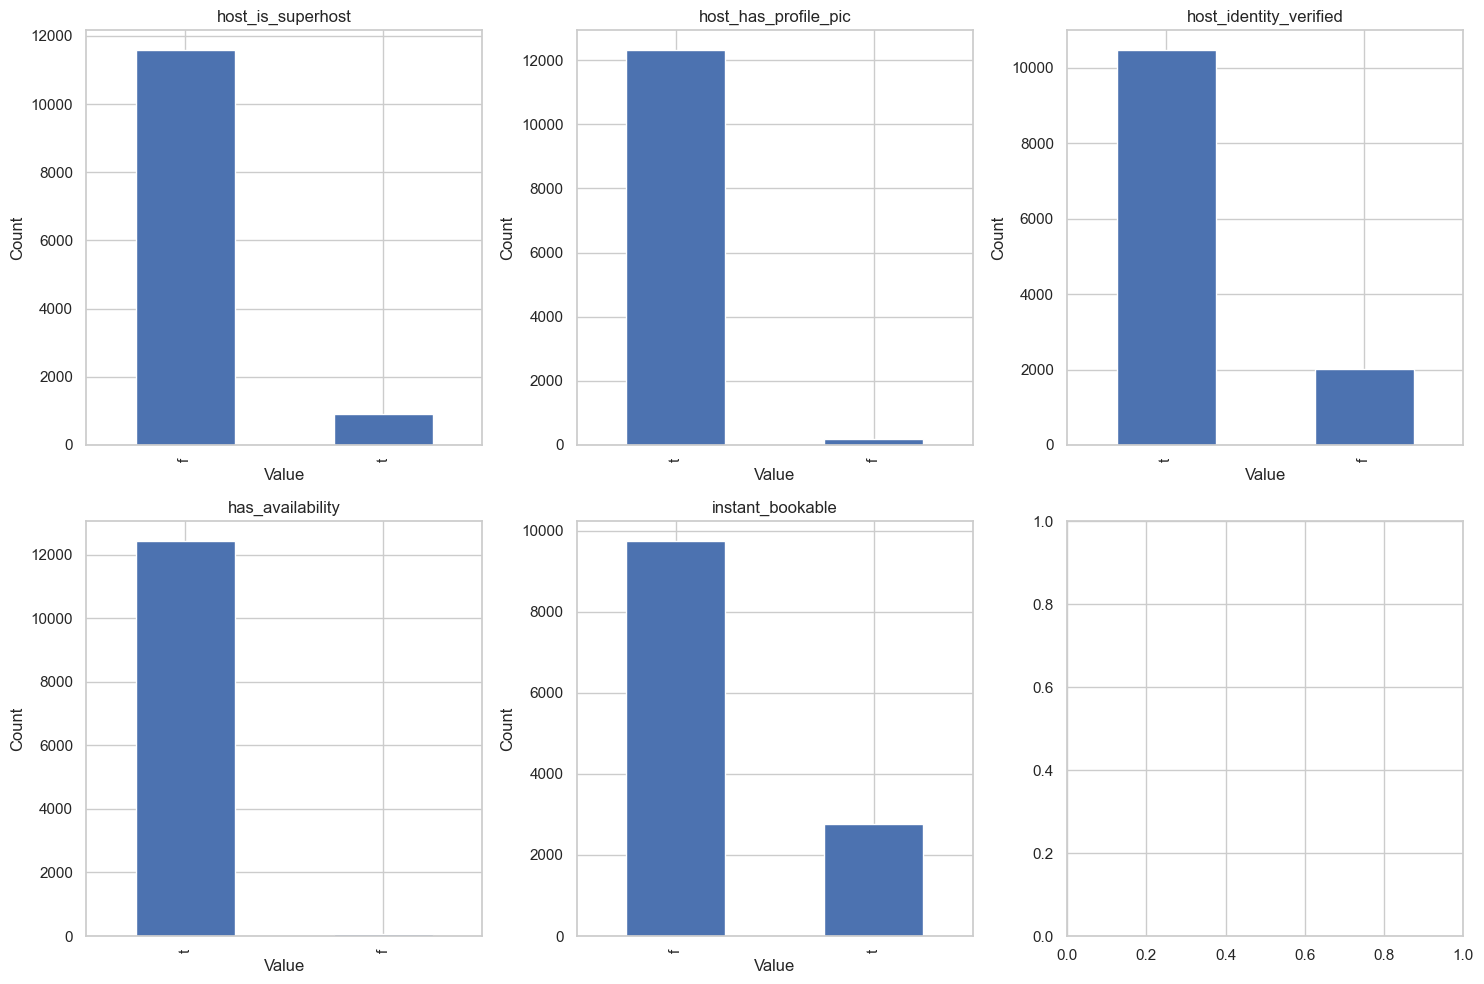

In [813]:
# Check variance for bool columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjusted for a 2x3 grid

for i, column in enumerate(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']):
    ax = axes[i//3, i%3]  # Adjusted for the 2x3 grid
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Frequency')

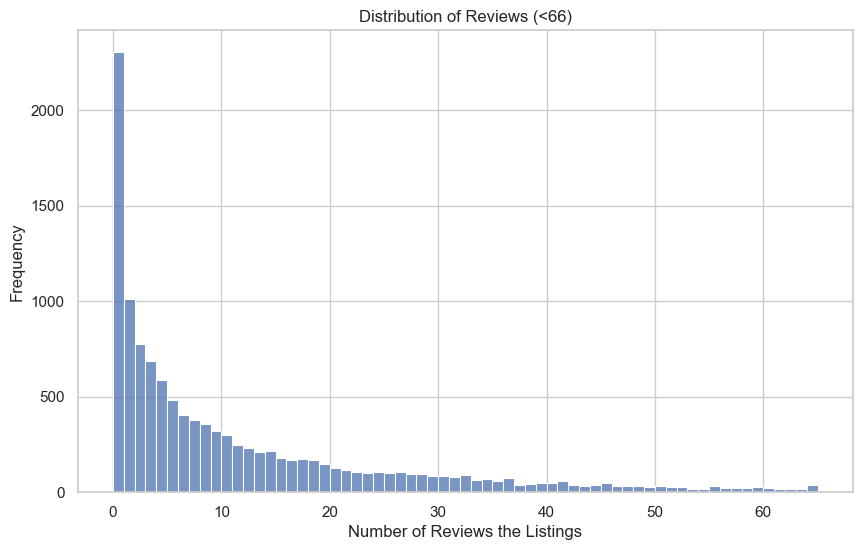

In [814]:
# Check variance for number_of_reviews
filtered_df = df[df['number_of_reviews'] <= 65]
sns.set(style="whitegrid")  # Set the aesthetic style of the plots
plt.figure(figsize=(10, 6))  # Set the size of the figure
# Create the distribution plot
sns.histplot(filtered_df['number_of_reviews'], kde=False, bins=65)  # 'kde' parameter adds a Kernel Density Estimate plot
plt.title('Distribution of Reviews (<66)')  # Add a title
plt.xlabel('Number of Reviews the Listings')  # Set the X-axis label
plt.ylabel('Frequency')  # Set the Y-axis label

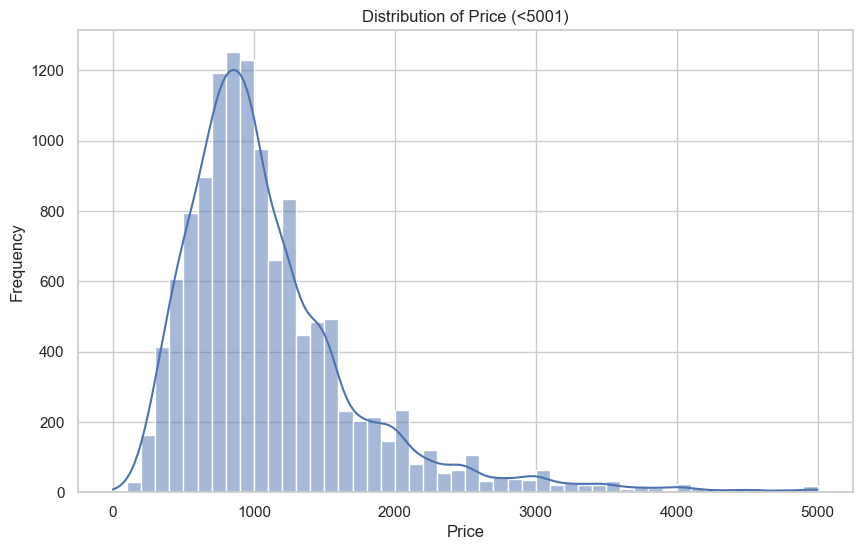

In [815]:
# Assuming 'df' is your DataFrame and 'number_of_reviews' is the column for which you want the distribution plot
# Filtering the DataFrame to include only rows where 'number_of_reviews' is 1000 or less
# Fixing price column
df['price'] = df['price'].str[1:-3]
df['price'] = df['price'].replace('\,','',regex=True)
df['price'] = df['price'].astype(int)

filtered_df = df[df['price'] <= 5000]

sns.set(style="whitegrid")  # Set the aesthetic style of the plots
plt.figure(figsize=(10, 6))  # Set the size of the figure

# Create the distribution plot using the filtered data
sns.histplot(filtered_df['price'], kde=True, bins=50)  # 'kde' parameter adds a Kernel Density Estimate plot

plt.title('Distribution of Price (<5001)')  # Add a title
plt.xlabel('Price')  # Set the X-axis label
plt.ylabel('Frequency')  # Set the Y-axis label

plt.show()  # Display the plot

# Generating New Columns

In [816]:
# Generating measures length of 'description' and 'host_about' column

# 'description_length'
df['description_length'] = df['description'].str.len() 

# 'host_about_length'
df['host_about_length'] = df['host_about'].str.len()

In [817]:
# Generating measures for number of bathrooms, and if they are shared

# 'nbr_bathrooms'
df['nbr_bathrooms'] = df['bathrooms_text'].replace({'Half-bath': '0.5', 'Shared half-bath': '0.5', 'Private half-bath': '0.5'}).str.extract(r'(\d+\.?\d*)').astype(float)

# 'bathrooms_shared', True or False based on the presence of 'shared', NaNs are retained
df['bathrooms_shared'] = df['bathrooms_text'].str.contains('shared', case=False, na=False)

In [818]:
# Generating the gender of the host based on the host name

# 'gender'
d = gender.Detector()
df['gender'] = df['host_name'].apply(lambda x: d.get_gender(x.split()[0]) if isinstance(x, str) else None)
# Female: 1 and Male: 0
df['gender'] = df['gender'].replace({'mostly_male': "Male", 'mostly_female': "Female", 'male': "Male", 'female': "Female", 'unknown': None, 'andy': None})

In [819]:
# Generating the number of days since the host first joined Airbnb based on 'host_since'

df['host_since'] = pd.to_datetime(df['host_since'])

# 'days_since_date'
df['days_since_date'] = (pd.Timestamp.today() - df['host_since']).dt.days

In [820]:
# Generating price_per_person based on price and accommodates

# 'price_per_person'
df['price_per_person'] = df['price'] / df['accommodates']

# Fixing Columns

In [821]:
# Fixing price column

#This has already been done to visualize price distribution in the exploration section
#df['price'] = df['price'].str[1:-3]
#df['price'] = df['price'].replace('\,','',regex=True)
#df['price'] = df['price'].astype(int)

In [822]:
# Cleaning host_acceptance_rate
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float')
df['host_acceptance_rate'] = df['host_acceptance_rate'] / 100

In [823]:
#fixing neighborhood cleansed names
name_mapping = {
    'Vesterbro-Kongens Enghave': 'Vesterbro-Kongens Enghave',
    'Nrrebro': 'Nørrebro',
    'Indre By': 'Indre By',
    'sterbro': 'Østerbro',
    'Frederiksberg': 'Frederiksberg',
    'Amager Vest': 'Amager Vest',
    'Amager st': 'Amager Øst',
    'Bispebjerg': 'Bispebjerg',
    'Valby': 'Valby',
    'Vanlse': 'Vanløse',
    'Brnshj-Husum': 'Brønshøj-Husum'
}

# Create a mask to identify misspelled names
mask = ~df['neighbourhood_cleansed'].isin(name_mapping.values())

# Replace the misspelled names with correct Danish names based on the mask
df.loc[mask, 'neighbourhood_cleansed'] = df.loc[mask, 'neighbourhood_cleansed'].map(name_mapping)

# Drop Rows

In [824]:
# Filter the DataFrame to keep rows where both 'number_of_reviews' and 'availability_365' are not 0 
df = df[~((df['number_of_reviews'] == 0)&(df['availability_365'] == 0))]

In [826]:
# Filter the DataFrame to keep rows where 'price' is not 0
df = df[df['price'] != 0]

# Drop Columns

In [827]:
columns_to_drop = [
    'neighbourhood_group_cleansed',
    'bathrooms',
    'calendar_updated',
    'license',
    'scrape_id',
    'calculated_host_listings_count_shared_rooms',
    'calculated_host_listings_count_private_rooms',
    'host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calendar_last_scraped',
    'host_total_listings_count',
    'last_scraped',
    'description',
    'name',
    'listing_url',
    'host_thumbnail_url',
    'picture_url',
    'host_picture_url',
    'host_url',
    'neighbourhood',
    'neighborhood_overview',
    'host_neighbourhood',
    'host_name',
    'host_location',
    'host_about',
    'host_has_profile_pic',
    'instant_bookable',
    'has_availability',
    'bathrooms_text',
    'minimum_nights',
    'maximum_nights',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm'
]


# Removing the columns
df = df.drop(columns=columns_to_drop)


# Save Data

In [828]:
df.to_csv('clean_data/cleaned.csv', index=False)

# Describe the Data